In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpmath import mp

## Activation functions

In [2]:
## Define different activation functions.

# ReLU.
relu = lambda x: np.maximum(0, x)

# Sigmoid.
sigm = lambda x: 1/(1+np.exp(-x))

# Step function.
step = lambda x: np.where(x<0, 0, 1)

# Hyperbolic tangent.
hytan = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

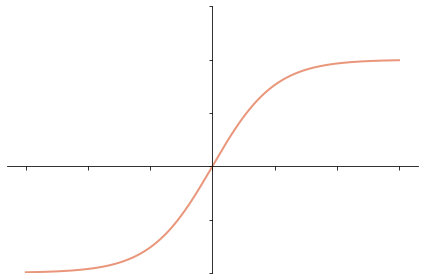

In [3]:
x = np.linspace(-3,3,1000)
cols = ["darksalmon", "gold", "olivedrab", "darkcyan"]

fig, ax = plt.subplots(1)

ax.plot(x, hytan(x), color=cols[0], linewidth=2)

#ax.plot(x, relu(x), label="ReLU", color=cols[1])

#ax.plot(x, hytan(x), label="Hyperbolic Tangent", color=cols[2])

#ax.plot(x, step(x), label="Step Function", color=cols[3])


plt.ylim([-1,1.5])

#plt.grid(True)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#plt.legend()
plt.tight_layout()
plt.savefig("hytan.pdf")

## Approximating the identity function with enhanced neurons
### Case 1: For ReLU activation function
ReLU, $\rho=\max\{0, x\}$, is continuous on all of $\mathbb{R}$, but only has a continuous derivative on the two intervals $]\infty, 0[$ and $]0; \infty[$. We cannot choose $]\infty, 0[$, since $\rho'=0$ on that interval. On $]0; \infty[$ $\rho$ is already the identity function, and nothing needs to be done.

Lets forget that we know how to construct the identity function, when we are using the ReLU function as the activation function, and instead follow the instructions provided in the proof: [See notes for equations].

To illustrate how the ReLU function is still vulnerable to numerical errors, we provide the following plots:

In [4]:
h = 1
alpha = 1

rho = lambda x: np.maximum(0, x)
d_rho = 1

phi_h = lambda x: h*x + alpha
psi_h = lambda x: (x-rho(alpha))/(h)

I_h = lambda x: psi_h(rho((phi_h(x))))

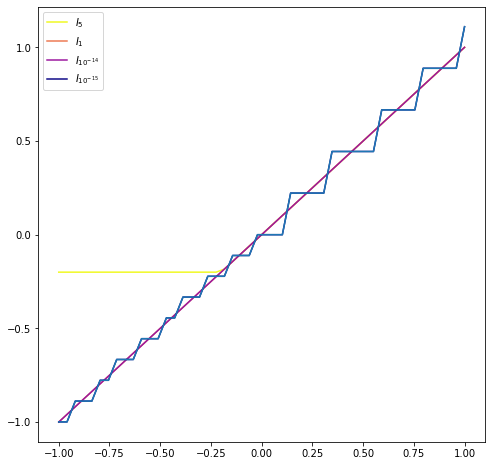

In [5]:
mp.dps = 15 # Define the decimal precision.

num_h_values = 4
#h_values = [5, 1, 1e-14, 1e-15]
h_values = [5, 1, 0.5, 1e-15]
labels = [r'$I_5$', r'$I_1$', r'$I_{10^{-14}}$', r'$I_{10^{-15}}$']
alpha = 1


mpfier = mp.mpf(1)
x = mpfier * np.linspace(-1,1)

cm_subset = np.linspace(1,0,num_h_values)

colors = [cm.plasma(x) for x in cm_subset]

fig, ax = plt.subplots(1, figsize=(8,8))

for i, h in enumerate(h_values):
    ax.plot(x, I_h(x), color=colors[i], label=labels[i])

plt.plot(x, I_h(x))
plt.legend()
plt.show()

### Case 2: For Sigmoid activation function

Lets consider $\rho = \frac{1}{1+\exp{(-x)}}$ which has derivative 

\begin{align}
    \rho'(x) = \frac{\exp{(x)}}{(1+\exp{(x)})^2}.
\end{align}

It is shaped like a bell curve:

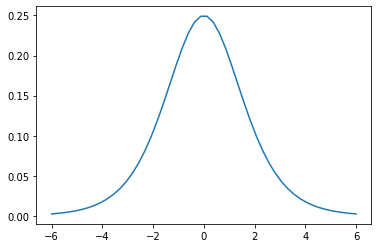

In [6]:
rho = lambda x: 1/(1+np.exp(-x))
d_rho = lambda x: np.exp(x) / (1+np.exp(x))**2

# Plot
x = np.linspace(-6,6)
plt.plot(x,d_rho(x))
plt.show()

Since $\rho'$ is continuous, we choose to consider the interval $[-5,5]$ and $\alpha=0$.

In [7]:
phi_h = lambda x, h, alpha: h*x + alpha
psi_h = lambda x, h, alpha: (x-rho(alpha))/(h*d_rho(alpha))

I_h = lambda x, h, alpha: psi_h(rho(phi_h(x, h, alpha)),h, alpha)

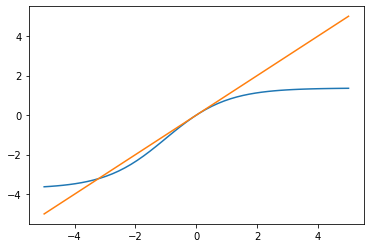

In [8]:
x = np.linspace(-5,5)
plt.plot(x,I_h(x,1,1), x, x)
plt.show()

### Case 3: $I_h$ for quadratic approximation function.
Let $\rho(x) = x^2$. Then $\rho'(x) = 2x$ and we find for any $\alpha\neq 0$

In [9]:
rho = lambda x: x**2
d_rho = lambda x: 2*x

phi_h = lambda x, h, alpha: h*x + alpha
psi_h = lambda x, h, alpha: (x - rho(alpha))/(h*d_rho(alpha))

I_h = lambda x, h, alpha: psi_h(rho(phi_h(x, h, alpha)), h, alpha)

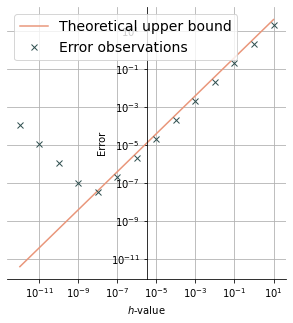

In [10]:
"""
Plot of error of I_h for rho(x)=x^2, as a function of h
"""

# Define constants.
x = np.linspace(-2,2)
alpha = 1
h_values = np.logspace(1, -12, num=14)
err = np.zeros(len(h_values))

# Define colors.
cm_subset = np.linspace(1,0,len(h_values))
colors = [cm.plasma(x) for x in cm_subset]

# Initialize figure.
fig, ax = plt.subplots(1, figsize=(5, 5))

#ax[0].plot(x, x, label='$I(x)$')
ax.plot(h_values, 4*h_values, label='Theoretical upper bound', color='darksalmon')

for i, h in enumerate(h_values):
    #ax[0].plot(x, I_h(x, h, alpha), color=colors[i])
    err[i] = np.max(np.abs(x - I_h(x,h,alpha)))

ax.plot(h_values, err, 'x', color='darkslategrey', label='Error observations')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$h$-value')
ax.set_ylabel('Error')

ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#plt.ylim([-2,5])
plt.grid()
plt.legend(prop={'size':14}) 
#plt.tight_layout()
plt.savefig("sigmoid_h_overflow.pdf")

#ax[0].legend()
#ax.legend()

#plt.show()

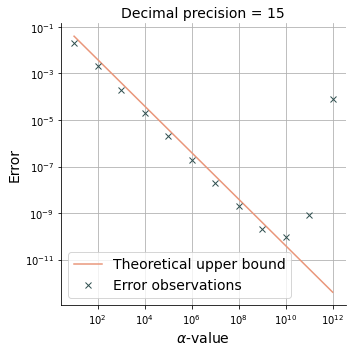

9.183687063958254e-11


In [11]:
"""
Plot of error of I_h for rho(x)=x^2, as a function of alpha.
To investigate if the upper bound is violated due to a numerical imprecision, we have used mpmath to increase the decimal precision.
"""

# Define an 'mpfier' to increase precision
mp.dps = 20 # Define the decimal precision.
mpfier = mp.mpf(1)

# Define constants.
x = mpfier*np.linspace(-2,2)
alpha_values = np.logspace(1, 12, num=12)
h = 0.1
err = np.zeros(len(alpha_values))

# Initialize figure and figure font.
fig, ax = plt.subplots(1, figsize=(5, 5))
font = {'size'   : 14}


#ax[0].plot(x, x, label='$I(x)$')
ax.plot(alpha_values, 0.4/alpha_values, label='Theoretical upper bound', color='darksalmon')

for i, alpha in enumerate(alpha_values):
    #ax[0].plot(x, I_h(x, h, alpha), color=colors[i])
    err[i] = np.max(np.abs(x - I_h(x,h,alpha)))

ax.plot(alpha_values, err, 'x', color='darkslategrey', label='Error observations')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Decimal precision = 15', **font)
ax.set_xlabel(r'$\alpha$-value', **font)
ax.set_ylabel('Error', **font)

#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.grid()
plt.legend(prop={'size':14}, loc=3) 
plt.tight_layout()
plt.savefig("sigmoid_alpha_overflow_dp15.pdf")

#ax[0].legend()
#ax.legend()

plt.show()
print(np.min(err))

In [12]:
# Machine epsilon
7/3 - 4/3 - 1

2.220446049250313e-16

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10 µs


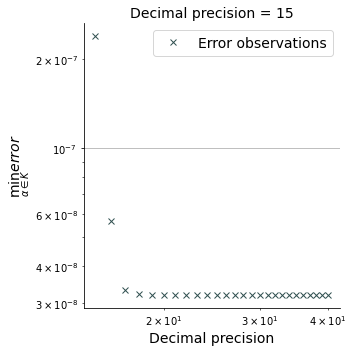

In [13]:
"""
Plot of minimum error of I_h over alpha in [1e1, 1e12] for rho(x)=x^2, as a function of dps.
To confirm that the upper bound is violated due to an overflow error, we have used mpmath to increase the precision.
"""
%time

# Define an 'mpfier' to increase precision
mp.dps = 15 # Define the decimal precision.
mpfier = mp.mpf(1)

# Define constants.
x = mpfier*np.linspace(-2,2)
alpha_values = np.logspace(2, 62, num=20)
dps = np.linspace(15,40, num=26)
h = 0.1
err = np.zeros(len(alpha_values))
min_err = np.zeros(len(dps))

# Initialize figure and figure font.
fig, ax = plt.subplots(1, figsize=(5, 5))
font = {'size'   : 14}


#ax[0].plot(x, x, label='$I(x)$')
#ax.plot(alpha_values, 0.4/alpha_values, label='Theoretical upper bound', color='darksalmon')

for i, d in enumerate(dps):
    mp.dps = d
    
    for j, alpha in enumerate(alpha_values):
        err[j] = np.max(np.abs(x - I_h(x,h,alpha)))
    min_err[i] = np.min(err)

ax.plot(dps, min_err, 'x', color='darkslategrey', label='Error observations')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Decimal precision = 15', **font)
ax.set_xlabel(r'Decimal precision', **font)
ax.set_ylabel(r'$\min_{\alpha \in K} error$', **font)

#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.grid()
plt.legend(prop={'size':14}) 
plt.tight_layout()
plt.savefig("sigmoid_alpha_overflow_dp15.pdf")

#ax[0].legend()
#ax.legend()

plt.show()

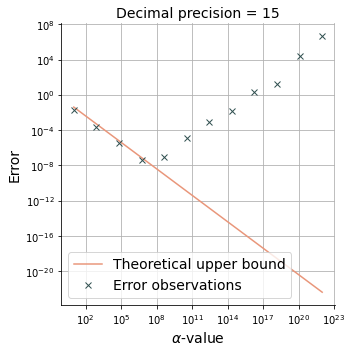

In [14]:
"""
Plot of error of I_h for rho(x)=x^2, as a function of alpha.
To confirm that the upper bound is violated due to an overflow error, we have used mpmath to increase the precision.
"""

# Define an 'mpfier' to increase precision
mp.dps = 42 # Define the decimal precision.
mpfier = mp.mpf(1)

# Define constants.
x = mpfier*np.linspace(-2,2)
alpha_values = np.logspace(1, 22, num=12)
h = 0.1
err = np.zeros(len(alpha_values))

# Initialize figure and figure font.
fig, ax = plt.subplots(1, figsize=(5, 5))
font = {'size'   : 14}


#ax[0].plot(x, x, label='$I(x)$')
ax.plot(alpha_values, 0.4/alpha_values, label='Theoretical upper bound', color='darksalmon')

for i, alpha in enumerate(alpha_values):
    #ax[0].plot(x, I_h(x, h, alpha), color=colors[i])
    err[i] = np.max(np.abs(x - I_h(x,h,alpha)))

ax.plot(alpha_values, err, 'x', color='darkslategrey', label='Error observations')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Decimal precision = 15', **font)
ax.set_xlabel(r'$\alpha$-value', **font)
ax.set_ylabel('Error', **font)

#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.grid()
plt.legend(prop={'size':14}, loc=3) 
plt.tight_layout()
plt.savefig("sigmoid_alpha_overflow_dp15.pdf")

#ax[0].legend()
#ax.legend()

plt.show()

### Investigated the accumulated error in $(I_h)^n(x)$
We investigated how the error $\Vert I - (I_h)^n\Vert_\infty$ behaves for $\rho(x)=x^2$ and $h$ fixed as $n$ increases.

In [15]:
rho = lambda x: x**2
d_rho = lambda x: 2*x

phi_h = lambda x, h, alpha: h*x + alpha
psi_h = lambda x, h, alpha: (x - rho(alpha))/(h*d_rho(alpha))

I_h = lambda x, h, alpha: psi_h(rho(phi_h(x, h, alpha)), h, alpha)

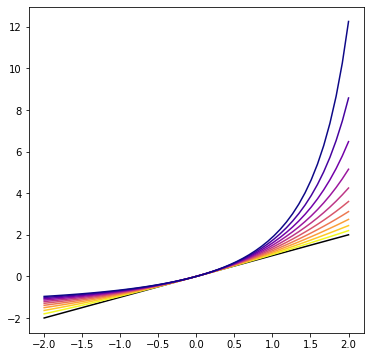

In [16]:
# Define constants.
h = 0.1
alpha = 1
x=np.linspace(-2,2)
Ihx = x
n = 10

# Define colors.
cm_subset = np.linspace(1,0,n)
colors = [cm.plasma(x) for x in cm_subset]


fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x,x, color='k')
for i in range(n):
    Ihx = I_h(Ihx, h, alpha)
    ax.plot(x, Ihx, color=colors[i])
    #ax.plot(x, I_h(x,h,alpha), color='darksalmon')

plt.show()